# 读取文件（观察数据集结构）

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#读取pima糖尿病数据集
pima=pd.read_csv("diabetes.csv")

In [4]:
#查看数据集前五项
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# 查看数据集的基本信息（可用于检测是否有空值/数值类型为多少）
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#查看数据集的统计描述
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 数据集说明
皮马印第安人糖尿病数据集包含768个样本，每个样本有9个属性。这些属性包括：
- Pregnancies：怀孕次数
- Glucose：葡萄糖，口服葡萄糖耐量试验中2小时血浆葡萄糖浓度的变化
- BloodPressure：血压舒张压 （mm Hg）
- SkinThickness：三头肌皮肤褶皱厚度（mm）
- Insulin：胰岛素，2 小时血清胰岛素 （mu U/ml）
- BMI：体重指数，体重指数（BMI）（体重 kg/（身高 m）^2）
- DiabetesPedigreeFunction：糖尿病谱系功能
- Age：年龄
- Outcome：结果：1为患病，0为不患病

### EDA：观察数据集特征之间的关系

In [7]:
#先看看他们的线性关系
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


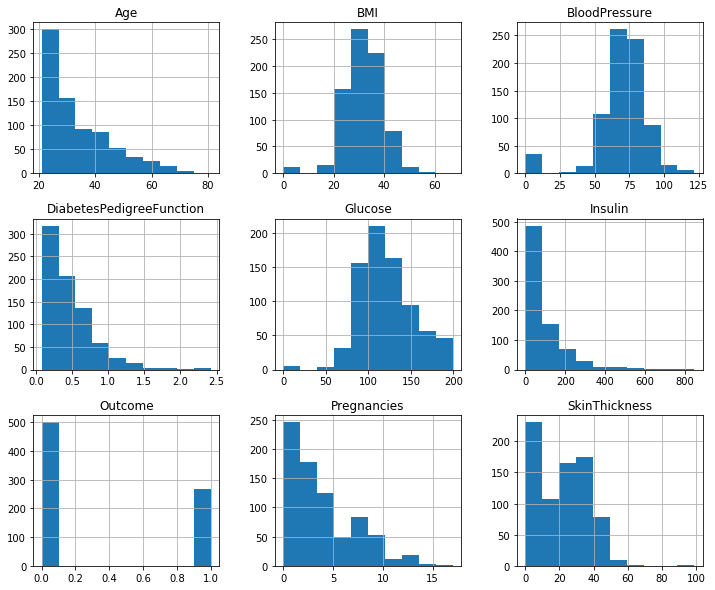

In [8]:
#我们用直方图：查看每个特征的分布情况
pima.hist(figsize=(12,10))
plt.show()

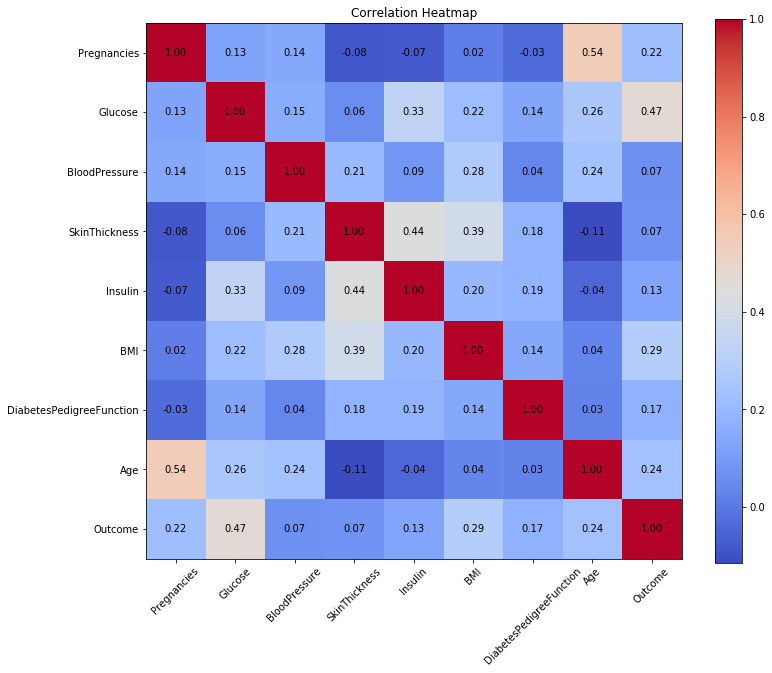

In [9]:
#我们用热力图康康：查看所有数值特征之间的相关性。
corr=pima.corr()

#创建热力图
plt.figure(figsize=(12,10))
plt.imshow(corr,cmap='coolwarm',interpolation='none')

#添加颜色条
plt.colorbar()

#添加坐标轴标签
plt.xticks(range(len(corr)),corr.columns,rotation=45)
plt.yticks(range(len(corr)),corr.columns)

#在单元格显示数值
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j,i,f'{corr.iloc[i,j]:.2f}',ha='center',va='center',color='black')

#添加标题并显示图表
plt.title('Correlation Heatmap')
plt.show()

### 训练和测试数据集

In [10]:
#将数据集分为自变量和因变量
x=pima.drop('Outcome',axis=1)#删除最后一列（Outcome）的列表，就是我们想要的
y=pima['Outcome']

#那我们现在就要开始抽样啦！！！
test_size=0.2     #我们测试集的比例
#随机抽取数据集
x_train=x.sample(frac=1-test_size,random_state=42)
# 剩余数据作为测试集
x_test=x.drop(x_train.index)
#对应的y也要像上面一样分类
y_train=y[x_train.index]
y_test=y[x_test.index]

#接下来特征缩放
x_mean1=x_train.mean()
x_mean2=x_test.mean()
x_std1=x_train.std()
x_std2=x_test.std()
x_train=(x_train-x_mean1)/x_std1
x_test=(x_test-x_mean2)/x_std2

# 添加一列全为1的截距项
x_train['intercept'] = 1
x_test['intercept'] = 1

### 实现逻辑回归的类封装

In [14]:
class LogisticRegression:
     #先定义一些最基础的参数（如超参数：学习率，迭代次数，误差结束数）
    def __init__(self,learning_rate=0.001,max_iteration=1000,tol=1e-4):
        self.learning_rate=learning_rate
        self.max_iteration=max_iteration
        self.tol=tol
        self.theta=None
        self.loss_history=[]
        
    #那么开始我们的迭代之旅吧
    def fit(self,x,y):
        m,n=x.shape
        self.theta=np.zeros(n)   #将逻辑回归中的多元线性回归的参数归空
        #后面用交叉熵来解决
        for i in range(self.max_iteration):
            z_pred=x @ self.theta
            y_pred=1/(1+np.exp(-z_pred))
            # 限制 y_pred 的范围，避免数值溢出
            y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
            Loss=-(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).mean()
            self.loss_history.append(Loss)
            
            gradient=(x.T @ (y_pred-y))/m #梯度
            
            self.theta-=self.learning_rate*gradient  #梯度下降
            
            if len(self.loss_history)>1 and abs(self.loss_history[-2]-self.loss_history[-1])<self.tol:
                    break
                    
        return self
    
    #将训练好的模型运用到我们的自变量中
    def predict(self,x):
        return 1/(1+np.exp(-(x @ self.theta))) 
    
    #用交叉熵评估公式
    def Cross(self,x,y):
        y_pred=self.predict(x)
        Cross=-(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).mean()
        return Cross

### 是时候实现逻辑回归了！！！

In [15]:
# 创建并训练模型
#梯度下降
model = LogisticRegression(learning_rate=0.01, max_iteration=10000)
model.fit(x_train, y_train)
print(f"梯度下降测试集交叉熵分数: {model.Cross(x_test, y_test):.4f}")
print("******************************************************")#我是分割线

梯度下降测试集交叉熵分数: 0.5147
******************************************************


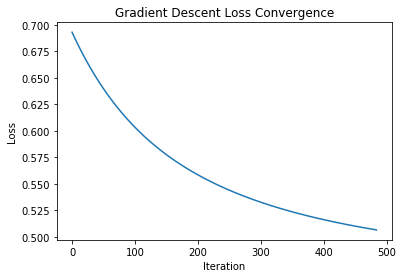

In [16]:
#创建关于使用梯度下降的Loss图像
plt.plot(model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent Loss Convergence")
plt.show()